In [23]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [24]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")
def missing (df1):
    missing_number = df1.isnull().sum().sort_values(ascending=False)
    missing_percent = ((df1.isnull().sum()/df1.isnull().count())*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values
missing(df1)

,Missing_Number,Missing_Percent
CryoSleep,217,2.496261
ShoppingMall,208,2.392730
VIP,203,2.335212
HomePlanet,201,2.312205
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
Destination,182,2.093639


In [4]:
missing(df2)

,Missing_Number,Missing_Percent
FoodCourt,106,2.478373
Spa,101,2.361468
Cabin,100,2.338087
ShoppingMall,98,2.291326
Name,94,2.197802
CryoSleep,93,2.174421
VIP,93,2.174421
Destination,92,2.151040
Age,91,2.127660
HomePlanet,87,2.034136


In [5]:
#Lable Encoding
le=LabelEncoder()
df1['Transported']= le.fit_transform(df1['Transported'])
df1['HomePlanet'] = le.fit_transform(df1['HomePlanet'])
df1['Cabin'] = le.fit_transform(df1['Cabin'])
df1['Destination'] =le.fit_transform(df1['Destination'])
df1['CryoSleep'] =le.fit_transform(df1['CryoSleep'])
df1['VIP'] =le.fit_transform(df1['VIP'])
df1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,146,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,0,1,5280,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,0,0,5285,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,1,0,2131,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [7]:
df1.drop("Name",axis=1,inplace = True)
df1['Destination'].unique()

array([2, 1, 0, 3])

In [8]:
df1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,146,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,9278_01,0,1,5280,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,9279_01,0,0,5285,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,9280_01,1,0,2131,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


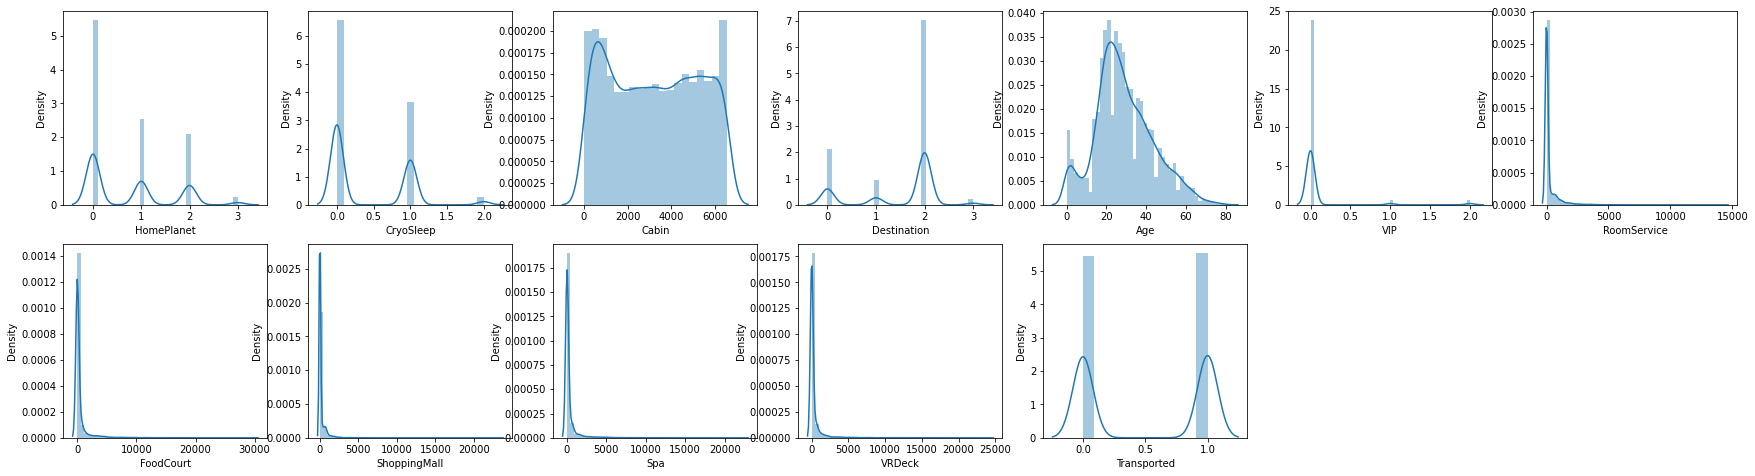

In [9]:
count=1
plt.subplots(figsize=(30,25))
for i in df1.columns:
    if df1[i].dtypes!='object':
        plt.subplot(6,7,count)
        sns.distplot(df1[i])
        count+=1

plt.show()

In [10]:
cor = df1.corr()
cor

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,1.000000,0.068726,-0.425569,0.042618,0.124376,0.044255,0.194435,0.056788,0.090020,0.045538,0.035397,0.107755
CryoSleep,0.068726,1.000000,0.100689,-0.085571,-0.069141,-0.023407,-0.219033,-0.183855,-0.189642,-0.180362,-0.173856,0.404716
Cabin,-0.425569,0.100689,1.000000,0.113260,-0.239782,-0.053158,-0.073801,-0.262681,-0.068352,-0.182872,-0.212647,-0.052604
Destination,0.042618,-0.085571,0.113260,1.000000,-0.004248,-0.024905,0.044733,-0.110659,0.022977,-0.053614,-0.073654,-0.104817
Age,0.124376,-0.069141,-0.239782,-0.004248,1.000000,0.032874,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
VIP,0.044255,-0.023407,-0.053158,-0.024905,0.032874,1.000000,0.038368,0.055531,-0.009756,0.019832,0.054235,-0.014260
RoomService,0.194435,-0.219033,-0.073801,0.044733,0.068723,0.038368,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.056788,-0.183855,-0.262681,-0.110659,0.130421,0.055531,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.090020,-0.189642,-0.068352,0.022977,0.033133,-0.009756,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.045538,-0.180362,-0.182872,-0.053614,0.123970,0.019832,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131


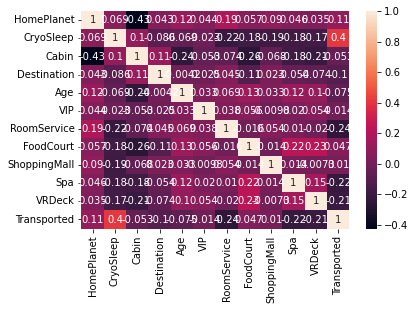

In [11]:
ax = sns.heatmap(df1.corr(), annot=True)
plt.show()

In [12]:
X=df1.drop('Transported',axis=1)
y=df1['Transported']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
clf = RandomForestClassifier(max_depth=10, random_state=42)
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
df3=df2
df3.shape

(4277, 13)

In [15]:
df3.drop("Name",axis=1,inplace = True)
missing(df3)

,Missing_Number,Missing_Percent
FoodCourt,106,2.478373
Spa,101,2.361468
Cabin,100,2.338087
ShoppingMall,98,2.291326
CryoSleep,93,2.174421
VIP,93,2.174421
Destination,92,2.151040
Age,91,2.127660
HomePlanet,87,2.034136
RoomService,82,1.917232


In [16]:
for i in df3.columns:
    if df3[i].dtypes == 'object':
        df3[i].fillna(df3[i].mode()[0], inplace=True)
    else:
        df3[i].fillna(df3[i].median(), inplace=True)
print(df1)
for i in df3.columns:
    if df3[i].dtypes == 'object':
        df3[i].fillna(df3[i].mode()[0], inplace=True)
    else:
        df3[i].fillna(df3[i].median(), inplace=True)
print(df1)

     PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0        0001_01           1          0    149            2  39.0    0   
1        0002_01           0          0   2184            2  24.0    0   
2        0003_01           1          0      1            2  58.0    1   
3        0003_02           1          0      1            2  33.0    0   
4        0004_01           0          0   2186            2  16.0    0   
...          ...         ...        ...    ...          ...   ...  ...   
8688     9276_01           1          0    146            0  41.0    1   
8689     9278_01           0          1   5280            1  18.0    0   
8690     9279_01           0          0   5285            2  26.0    0   
8691     9280_01           1          0   2131            0  32.0    0   
8692     9280_02           1          0   2131            2  44.0    0   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0             0.0        0.0         

In [18]:
missing(df3)

,Missing_Number,Missing_Percent
PassengerId,0,0.0
HomePlanet,0,0.0
CryoSleep,0,0.0
Cabin,0,0.0
Destination,0,0.0
Age,0,0.0
VIP,0,0.0
RoomService,0,0.0
FoodCourt,0,0.0
ShoppingMall,0,0.0


In [25]:
for i in df1.columns:
    if df1[i].dtypes == 'object':
        df1[i].fillna(df1[i].mode()[0], inplace=True)
    else:
        df1[i].fillna(df1[i].median(), inplace=True)
print(df1)

     PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa      False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth      False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa      False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa      False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth      False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...        ...       ...            ...   ...    ...   
8688     9276_01     Europa      False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth       True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth      False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa      False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa      False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingM

In [22]:
missing(df1)
clf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [21]:
#Lable Encoding
le=LabelEncoder()
df3['CryoSleep']= le.fit_transform(df3['CryoSleep'])
df3['VIP']= le.fit_transform(df3['VIP'])
df3['HomePlanet']= le.fit_transform(df3['HomePlanet'])
df3['Cabin']= le.fit_transform(df3['Cabin'])
df3['Destination']= le.fit_transform(df3['Destination'])
y_df3 =clf.predict(df3)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.